# Week 3 - SIR models of disease dynamics

- Julia functions have access to all variables that are visible at the level that the function is created.

In [1]:
b = 7;
f(x) = b*x
f(6)

42

In [2]:
function updateSIR(popnvector)
    susceptibles = popnvector[1];
    infecteds = popnvector[2];
    removeds = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]
end

updateSIR (generic function with 1 method)

In [3]:
dt = 0.5
lambda = 1/200; gam=1/10

s, i, r = 1000, 10, 20
vec = [s i r]
updateSIR(vec)

1×3 Array{Float64,2}:
 975.0  34.5  20.5

## The loop structure


In [4]:
# set the values that define the current run
lambda = 1/20000 # infection rate parameter (assumes rates are per day)
gam = 1/10 # recovery rate parameter (ditto)
dt = 0.5 # length of timem step in days
tfinal = 610; # respecting community values: lowercase only in the names
s0 = 10000.0 # initial susceptibles, note that we use the type Float64 frommo the start
i0 = 4. # initial infecteds; set this to 1. to mimic and epidemic with an index case
r0 = 0. # not always the case,  of course

# initialise the current run
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step,:])
    timevec[step+1] = timevec[step] + dt
end

## Plotting the results

In [5]:
using Plots
gr()

Plots.GRBackend()

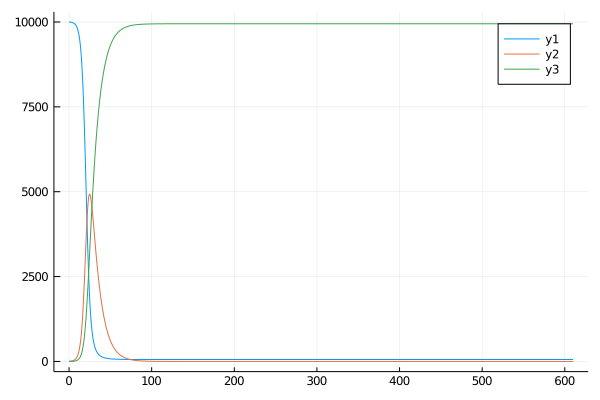

In [6]:
plot(timevec, resultvals)

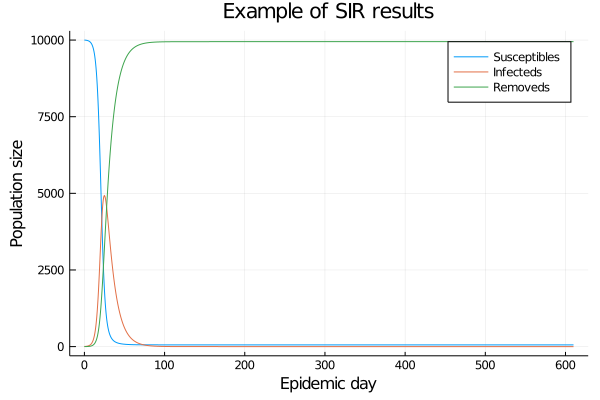

In [7]:
plot(timevec, resultvals,
title = "Example of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label = ["Susceptibles" "Infecteds" "Removeds"])

# More on SIR models

## The threshold prediction of our SIR model


In [8]:
# The updated values
gam = 1/20
lambda = 2.3e-8
dt = 0.5
tfinal = 610.;
s0 = 22.0e6
i0 = 4.
r0 = 0.

nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1,:] = [s0, i0, r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

In [9]:
using Plots
gr()

Plots.GRBackend()

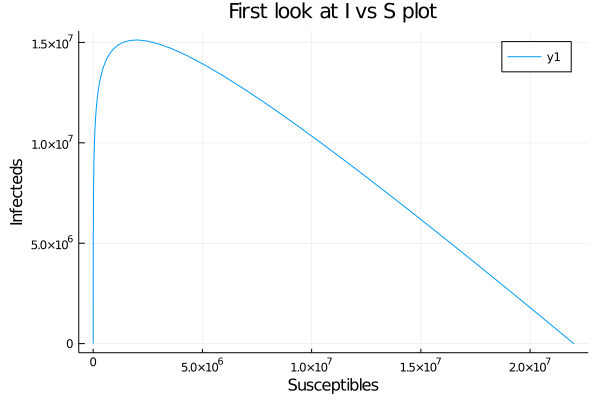

In [10]:
svals = resultvals[:, 1];
ivals = resultvals[:, 2];

plot(svals, ivals,
title="First look at I vs S plot",
xlabel="Susceptibles",
ylabel="Infecteds")

## Putting it all together: estimates of gamma and lambda

---

# Plotting Data and an Approximately Fitted Line Simultaneously

## Julia's modify-the-argument functions


In [11]:
tempvar = Array{Any}(undef, 4)
fill!(tempvar, "hello ... world")

4-element Array{Any,1}:
 "hello ... world"
 "hello ... world"
 "hello ... world"
 "hello ... world"

In [12]:
fill!(tempvar, 777)

4-element Array{Any,1}:
 777
 777
 777
 777

## The difference between `plot` and `plot!`

- Use the first example, but with the differences

## An example: approximating the cosine function

In [13]:
function approxcos(x)
    outval = Array{Any}(undef, size(x))
    ii = 0
    for aa in x
        y = 1 - aa^2/2 + aa^4/24 - aa^6/720 + aa^8/(56*720)
        ii = ii+1
        outval[ii] = y
    end
    return outval
end

x1 = 4*rand(10)
x2 = range(0., stop=4., step=0.01)

y1 = approxcos(x1)
y2 = cos.(x2);

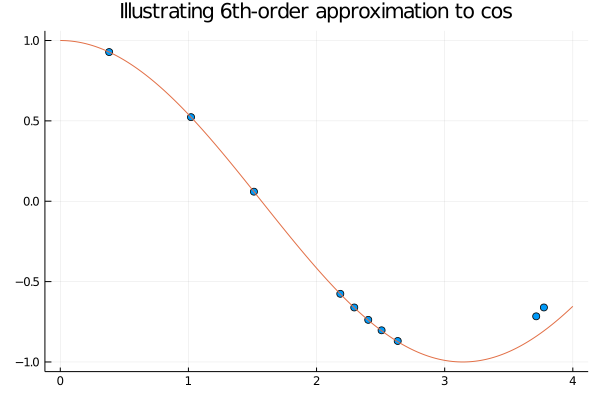

In [14]:
using Plots; gr()

scatter(x1, y1, legend=:false, title="Illustrating 6th-order approximation to cos")
plot!(x2, y2)

## Using the data-fitting the model parameters

In [16]:
using Plots
gr()
using DelimitedFiles

# Lets get the total cases data
EVDdata = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',')
tvalsfromdata = EVDdata[:, 1]
totalcasesfromdata = EVDdata[:, 2]



54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

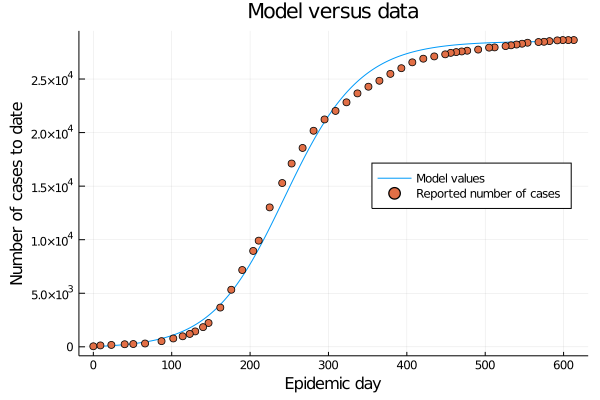

In [33]:
# Set parameter values
lambda = 1.47 *10^-6.
gam = 0.125
dt = 0.5
tfinal = 610.;

# Set initial values
s0 = 1.0*10^5.
i0 = 20.
r0 = 0.

# Initialise
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef, nsteps+1, 3)
timevec = Array{Float64}(undef, nsteps+1)
resultvals[1, :] = [s0, i0, r0]
timevec[1] = 0.

# The main loop over time steps
for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end

# Make the plot
ivals = resultvals[:, 2]
rvals = resultvals[:, 3]
cvals = ivals + rvals

plot(timevec, cvals,
label = "Model values",
xlabel = "Epidemic day",
ylabel = "Number of cases to date",
title = "Model versus data")

plot!(tvalsfromdata, totalcasesfromdata,
legend = :right,
line = :scatter,
label = "Reported number of cases")

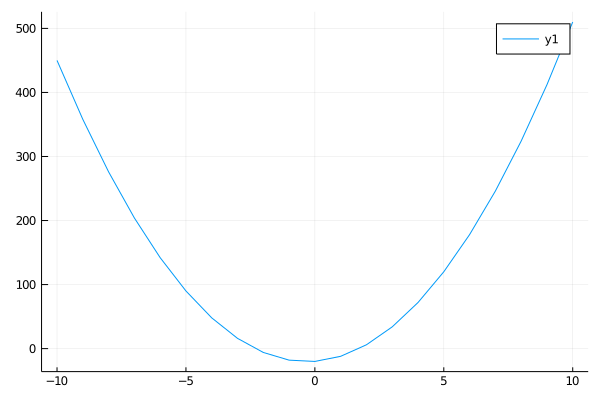

In [34]:
using Plots

f(x) = 5 * x^2 + 3 * x - 20
plot(f, -10:10) 

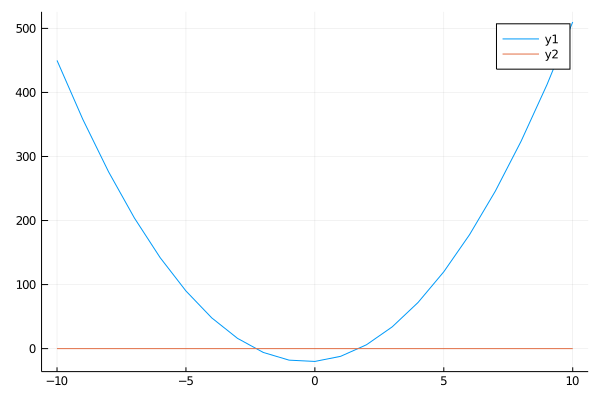

In [35]:
plot!(zero, -10, 10)

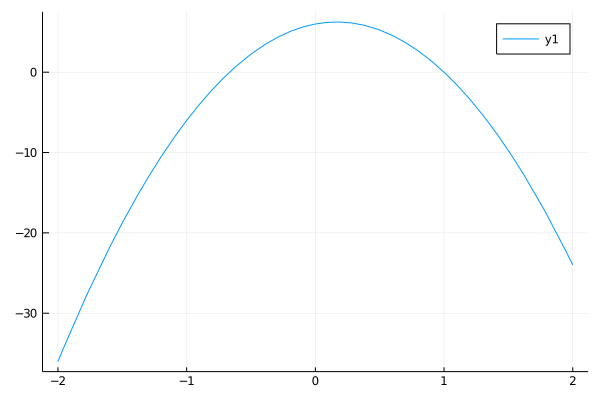

In [38]:
f(x) = -9*x^2 + 3*x + 6

using Plots
plot(f, -2, 2)

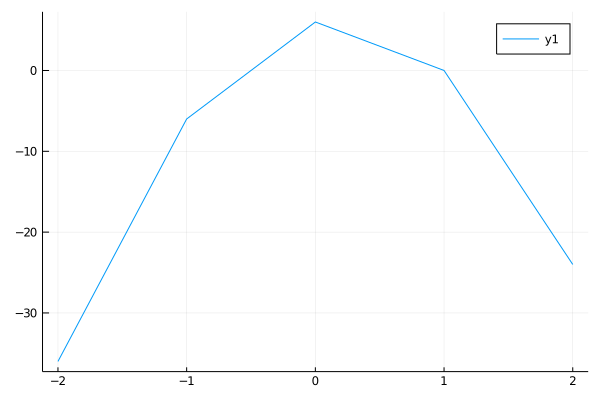

In [43]:
plot(f, -2:2)

# Practicing fitting a circle to data

## Plotting a circle with adjustable radius and centre


In [72]:
using Plots

r = 5
x0, y0 = 1, 2

function trialcircle(r, x0, y0)
#     t = linspace(0, 2π, 200)
    t = range(0, stop=2*π, length=200)
    x, y = r*cos.(t), r*sin.(t)
    x, y = x.+x0, y.+y0
    plot(x, y)
end

trialcircle (generic function with 1 method)

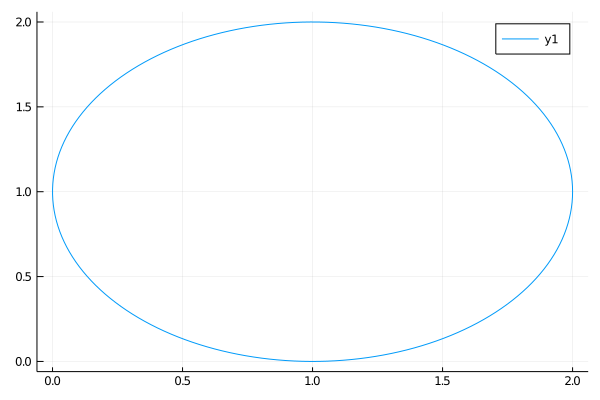

In [73]:
trialcircle(1,1,1)

In [74]:

function trialcircle!(r, x0, y0)
    t = range(0, stop=2*π, length=200)
    x, y = r*cos.(t), r*sin.(t)
    x, y = x.+x0, y.+y0
    plot!(x, y)
end

trialcircle! (generic function with 1 method)

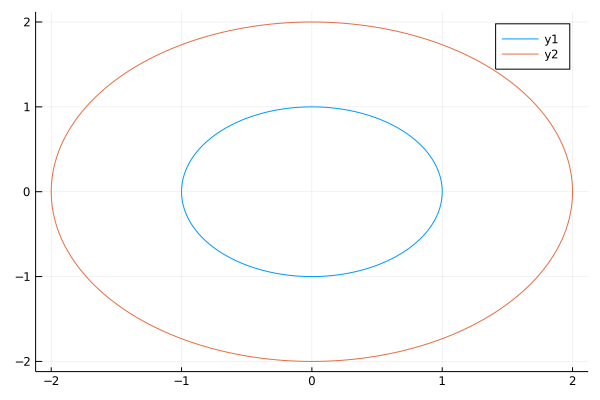

In [76]:
trialcircle(1,0,0)
trialcircle!(2,0,0)

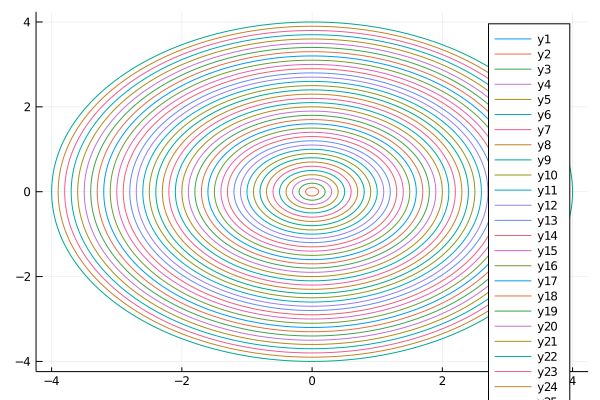

In [77]:
trialcircle(0, 0, 0)
for r = .1:.1:4
    trialcircle!(r, 0, 0)
end
plot!()

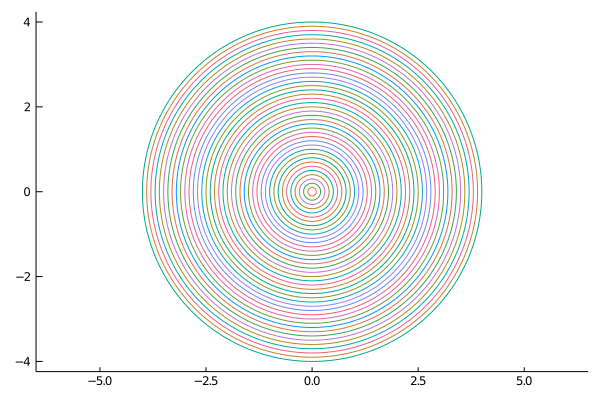

In [79]:
plot!(grid=false, legend=false, aspect_ratio=1)

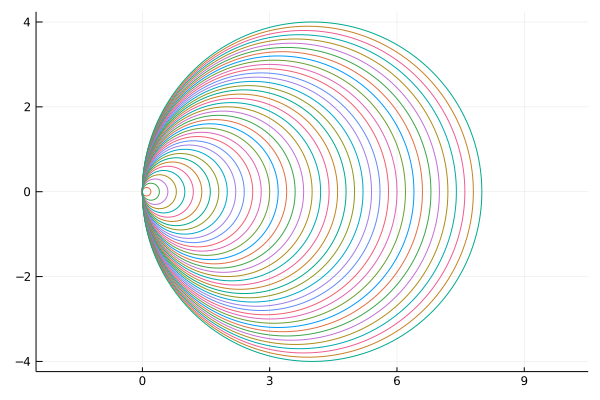

In [80]:
trialcircle(0, 0, 0)
for r = .1:.1:4
    trialcircle!(r, r, 0)
end
plot!(legend=false, gird=false, aspect_ratio=1)

 ## Pulling in and plotting the data
 

In [81]:
targetdat = readdlm("PracticeData,csv", ',')
typeof(targetdat)

LoadError: ArgumentError: Cannot open 'PracticeData,csv': not a file

In [82]:
size(targetdat)

LoadError: UndefVarError: targetdat not defined

In [83]:
targetx, targety = targetdat[1, :], targetdat[2, :]
scatter(targetx, targety, grid=false, legend=false, aspect_ratio=1)

LoadError: UndefVarError: targetdat not defined

## Superimposing a circle on the data

In [84]:
scatter(targetx, targety, grid=false, legend=false, aspect_ration=1)
trialcircle!(4.2, 1.65, -1.8

LoadError: UndefVarError: targetx not defined

## Adjusting the superimposed circle by hand